set()
set()


,Id,SalePrice_XGB,SalePrice_EN,SalePrice,diff_Train_XGB,diff_Train_EN
491,496,40266.740,50343.800829,34900,5366.740,15443.800829
908,917,37008.070,42195.365152,35311,1697.070,6884.365152
960,969,52984.324,65623.978461,37900,15084.324,27723.978461
527,534,43566.055,37016.130385,39300,4266.055,2283.869615
30,31,48688.848,66233.341240,40000,8688.848,26233.341240
702,711,69496.234,81983.224608,52000,17496.234,29983.224608
1327,1338,54432.180,54845.273090,52500,1932.180,2345.273090
698,706,68632.360,68179.253330,55000,13632.360,13179.253330
1315,1326,59478.664,63068.402369,55000,4478.664,8068.402369
804,813,70543.260,69425.148731,55993,14550.260,13432.148731


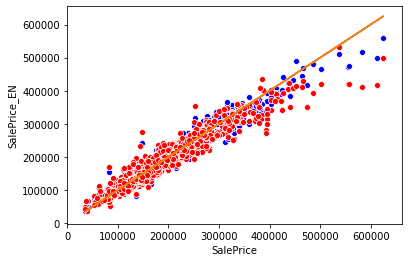

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.model_selection as ms
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### Elastic-Net vs. XGB Train Set diff

# Read in Sunny's EN Train set predictions
EN_Train_Preds = pd.read_csv("en_ytrain_pred.csv")

# Read in Vincent's XGB Train set predictions
XGB_Train_Preds = pd.read_csv("XGB_Train_Set_Predictions.csv")

# Check difference in ID between EN and XGB
print(set(XGB_Train_Preds.Id)-set(EN_Train_Preds.Id))
print(set(EN_Train_Preds.Id)-set(XGB_Train_Preds.Id))

# Read in train set
HousePrices = pd.read_csv('./data/train.csv')
HousePrices[["Id","SalePrice"]]

# Combine all the data
HousePrices_Train_Demo = pd.merge(XGB_Train_Preds, EN_Train_Preds, on="Id", how = "inner", suffixes=("_XGB","_EN"))
HousePrices_Train_Demo_Full = pd.merge(HousePrices_Train_Demo, HousePrices[["Id","SalePrice"]], on = "Id", how = "inner")
HousePrices_Train_Demo_Full 

# Plot the diffs
sns.scatterplot(HousePrices_Train_Demo_Full["SalePrice"], HousePrices_Train_Demo_Full["SalePrice_EN"], color = "red")
sns.scatterplot(HousePrices_Train_Demo_Full["SalePrice"], HousePrices_Train_Demo_Full["SalePrice_XGB"], color = "blue")

plt.plot(HousePrices_Train_Demo_Full["SalePrice"], 1*HousePrices_Train_Demo_Full["SalePrice"] + 0)

sns.scatterplot(HousePrices_Train_Demo_Full["SalePrice"], HousePrices_Train_Demo_Full["SalePrice_EN"], color = "red")
plt.plot(HousePrices_Train_Demo_Full["SalePrice"], 1*HousePrices_Train_Demo_Full["SalePrice"] + 0)


# Create XGB and EN diff vs. actual SalePrice
HousePrices_Train_Demo_Full["diff_Train_XGB"] = np.abs(HousePrices_Train_Demo_Full["SalePrice_XGB"] - HousePrices_Train_Demo_Full["SalePrice"])
HousePrices_Train_Demo_Full["diff_Train_EN"] = np.abs(HousePrices_Train_Demo_Full["SalePrice_EN"] - HousePrices_Train_Demo_Full["SalePrice"])


